# 🚀 Optimized RAGAS Synthetic Data Generation with LangGraph

This notebook demonstrates a **professional-grade** implementation of RAGAS Synthetic Data Generation using LangGraph Agent Graph with the Evol-Instruct method.

## 🎯 Key Optimizations

### **Performance & Reliability**
- ⚡ **Async Processing**: Optimized for concurrent operations
- 🔄 **Retry Logic**: Robust error handling with automatic retries
- 📊 **Progress Tracking**: Real-time progress bars and timing
- 💾 **Memory Management**: Efficient chunking and processing

### **Code Quality**
- 🏗️ **Type Safety**: Full type hints and dataclasses
- 📝 **Comprehensive Logging**: Structured logging with configurable levels
- ⚙️ **Configuration Management**: Centralized config with validation
- 🧪 **Error Handling**: Graceful failure handling and recovery

### **Data Quality**
- 📈 **Quality Metrics**: Confidence and relevance scoring
- 🔍 **Data Validation**: Input/output validation and sanitization
- 📊 **Analytics**: Built-in data quality analysis and reporting
- 🎨 **Visualization**: Enhanced data visualization and insights

## 🔄 Evolution Strategies

1. **Simple Evolution**: Enhanced specificity and detail
2. **Multi-Context Evolution**: Cross-document reasoning
3. **Reasoning Evolution**: Complex analytical thinking


## 🛠️ Optimized Setup and Dependencies


In [3]:
# Professional-grade imports with error handling
import os
import sys
import getpass
import logging
import warnings
from typing import List, Dict, Optional, Any
from pathlib import Path
import json
from datetime import datetime

# Data processing and analysis
import pandas as pd
import numpy as np
from tqdm import tqdm

# Visualization (optional imports with fallbacks)
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    MATPLOTLIB_AVAILABLE = True
    print("✅ Visualization libraries imported successfully")
except ImportError:
    MATPLOTLIB_AVAILABLE = False
    print("⚠️  Matplotlib/Seaborn not available - visualizations will be skipped")

try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    WORDCLOUD_AVAILABLE = False
    print("⚠️  WordCloud not available - word cloud visualizations will be skipped")

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# LangChain imports with error handling
try:
    from langchain_community.document_loaders import DirectoryLoader, PyMuPDFLoader
    from langchain_core.documents import Document
    print("✅ LangChain imports successful")
except ImportError as e:
    print(f"❌ LangChain import error: {e}")
    sys.exit(1)

# Custom imports
try:
    from ragas_langgraph_sdg_optimized import (
        OptimizedRagasLangGraphSDG, 
        SDGConfig, 
        create_optimized_config,
        EvolutionType
    )
    print("✅ Optimized SDG system imports successful")
except ImportError as e:
    print(f"❌ SDG system import error: {e}")
    print("Make sure ragas_langgraph_sdg_optimized.py is in the same directory")
    sys.exit(1)

print("🎉 All imports successful!")

# Visualization dependencies status
if MATPLOTLIB_AVAILABLE and WORDCLOUD_AVAILABLE:
    print("🎨 All visualization libraries available - full visualization support enabled!")
elif MATPLOTLIB_AVAILABLE:
    print("🎨 Basic visualization libraries available (wordcloud not available)")
else:
    print("\n💡 To enable visualizations, you can install the missing dependencies:")
    print("   uv add matplotlib seaborn wordcloud")
    print("\n⚠️  Visualizations will be skipped for now, but the core functionality will work fine!")


✅ Visualization libraries imported successfully
✅ LangChain imports successful
✅ Optimized SDG system imports successful
🎉 All imports successful!
🎨 All visualization libraries available - full visualization support enabled!


In [4]:
# Environment setup with validation
def setup_environment() -> Dict[str, str]:
    """
    Setup environment variables with validation
    
    Returns:
        Dictionary of environment variables
    """
    env_vars = {}
    
    # Set up LangChain tracing
    os.environ["LANGCHAIN_TRACING_V2"] = "true"
    
    # Get API keys with validation
    langchain_key = getpass.getpass("LangChain API Key (optional): ")
    if langchain_key.strip():
        os.environ["LANGCHAIN_API_KEY"] = langchain_key
        env_vars["LANGCHAIN_API_KEY"] = "✅ Set"
    else:
        env_vars["LANGCHAIN_API_KEY"] = "❌ Not set (optional)"
    
    openai_key = getpass.getpass("OpenAI API Key (required): ")
    if not openai_key.strip():
        raise ValueError("OpenAI API key is required!")
    os.environ["OPENAI_API_KEY"] = openai_key
    env_vars["OPENAI_API_KEY"] = "✅ Set"
    
    # Set project name
    from uuid import uuid4
    project_name = f"RAGAS-LangGraph-SDG-Optimized-{uuid4().hex[0:8]}"
    os.environ["LANGCHAIN_PROJECT"] = project_name
    env_vars["LANGCHAIN_PROJECT"] = project_name
    
    return env_vars

# Setup environment
try:
    env_status = setup_environment()
    print("🔧 Environment Setup Complete!")
    print("=" * 40)
    for key, status in env_status.items():
        print(f"{key}: {status}")
except Exception as e:
    print(f"❌ Environment setup failed: {e}")
    sys.exit(1)


🔧 Environment Setup Complete!
LANGCHAIN_API_KEY: ✅ Set
OPENAI_API_KEY: ✅ Set
LANGCHAIN_PROJECT: RAGAS-LangGraph-SDG-Optimized-120f20ba


## 📄 Optimized Document Loading


In [5]:
# Optimized document loading with error handling and validation
def load_documents_safely(data_path: str = "data/", max_docs: int = 10) -> List[Document]:
    """
    Load documents with comprehensive error handling and validation
    
    Args:
        data_path: Path to documents directory
        max_docs: Maximum number of documents to load
        
    Returns:
        List of loaded documents
    """
    print(f"📂 Loading documents from: {data_path}")
    
    # Validate path exists
    if not Path(data_path).exists():
        raise FileNotFoundError(f"Data directory not found: {data_path}")
    
    try:
        # Load documents with progress tracking
        loader = DirectoryLoader(
            data_path, 
            glob="*.pdf", 
            loader_cls=PyMuPDFLoader,
            show_progress=True
        )
        
        all_docs = loader.load()
        
        # Validate documents
        if not all_docs:
            raise ValueError("No documents loaded!")
        
        # Limit documents for performance
        docs = all_docs[:max_docs]
        
        # Document statistics
        total_pages = sum(doc.metadata.get('total_pages', 0) for doc in docs)
        total_chars = sum(len(doc.page_content) for doc in docs)
        
        print(f"✅ Successfully loaded {len(docs)} documents")
        print(f"📊 Statistics:")
        print(f"   - Total pages: {total_pages}")
        print(f"   - Total characters: {total_chars:,}")
        print(f"   - Average chars per doc: {total_chars // len(docs):,}")
        
        # Document preview
        print(f"\n📋 Document Preview:")
        for i, doc in enumerate(docs[:3], 1):
            title = doc.metadata.get('title', 'Untitled')
            pages = doc.metadata.get('total_pages', 'Unknown')
            chars = len(doc.page_content)
            preview = doc.page_content[:100].replace('\n', ' ')
            print(f"   {i}. {title} ({pages} pages, {chars:,} chars)")
            print(f"      Preview: {preview}...")
        
        if len(docs) > 3:
            print(f"   ... and {len(docs) - 3} more documents")
            
        return docs
        
    except Exception as e:
        print(f"❌ Document loading failed: {e}")
        raise

# Load documents
try:
    docs = load_documents_safely(max_docs=5)  # Limit for demo
except Exception as e:
    print(f"❌ Failed to load documents: {e}")
    sys.exit(1)


📂 Loading documents from: data/


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

✅ Successfully loaded 5 documents
📊 Statistics:
   - Total pages: 320
   - Total characters: 15,675
   - Average chars per doc: 3,135

📋 Document Preview:
   1. How People Use ChatGPT (64 pages, 1,672 chars)
      Preview: NBER WORKING PAPER SERIES HOW PEOPLE USE CHATGPT Aaron Chatterji Thomas Cunningham David J. Deming Z...
   2. How People Use ChatGPT (64 pages, 2,051 chars)
      Preview: How People Use ChatGPT Aaron Chatterji, Thomas Cunningham, David J. Deming, Zoe Hitzig, Christopher ...
   3. How People Use ChatGPT (64 pages, 3,823 chars)
      Preview: 1 Introduction ChatGPT launched in November 2022. By July 2025, 18 billion messages were being sent ...
   ... and 2 more documents


## ⚙️ Configuration and System Initialization


In [6]:
# Create optimized configuration
config = create_optimized_config(
    llm_model="gpt-4o-mini",
    embedding_model="text-embedding-3-small",
    chunk_size=1000,
    chunk_overlap=100,
    max_documents=5,  # Optimized for demo
    questions_per_document=2,  # Optimized for demo
    temperature=0.7,
    max_retries=3,
    timeout_seconds=300,
    log_level="INFO",
    export_dir="synthetic_data_output"
)

print("🔧 Configuration Created:")
print("=" * 40)
for field, value in config.__dict__.items():
    print(f"{field}: {value}")

# Initialize optimized SDG system
try:
    sdg_system = OptimizedRagasLangGraphSDG(config)
    print(f"\n✅ Optimized SDG system initialized successfully!")
    print(f"📊 System ready for processing {config.max_documents} documents")
    print(f"🎯 Target: {config.questions_per_document} questions per document")
except Exception as e:
    print(f"❌ System initialization failed: {e}")
    sys.exit(1)


🔧 Configuration Created:
llm_model: gpt-4o-mini
embedding_model: text-embedding-3-small
chunk_size: 1000
chunk_overlap: 100
max_documents: 5
questions_per_document: 2
temperature: 0.7
max_retries: 3
timeout_seconds: 300
log_level: INFO
export_dir: synthetic_data_output


2025-10-05 17:34:01,902 - ragas_langgraph_sdg_optimized - INFO - Initialized SDG system with config: SDGConfig(llm_model='gpt-4o-mini', embedding_model='text-embedding-3-small', chunk_size=1000, chunk_overlap=100, max_documents=5, questions_per_document=2, temperature=0.7, max_retries=3, timeout_seconds=300, log_level='INFO', export_dir='synthetic_data_output')



✅ Optimized SDG system initialized successfully!
📊 System ready for processing 5 documents
🎯 Target: 2 questions per document


## 🚀 Optimized Synthetic Data Generation


In [7]:
# Generate synthetic data with comprehensive error handling and progress tracking
def generate_synthetic_data_safely(sdg_system: OptimizedRagasLangGraphSDG, documents: List[Document]) -> Dict[str, Any]:
    """
    Generate synthetic data with error handling and progress tracking
    
    Args:
        sdg_system: Initialized SDG system
        documents: List of documents to process
        
    Returns:
        Generated synthetic data
    """
    print("🚀 Starting Optimized Synthetic Data Generation")
    print("=" * 60)
    print("🔄 Evolution Strategies:")
    print("   1. Simple Evolution - Enhanced specificity and detail")
    print("   2. Multi-Context Evolution - Cross-document reasoning")
    print("   3. Reasoning Evolution - Complex analytical thinking")
    print()
    
    start_time = datetime.now()
    
    try:
        # Generate synthetic data
        synthetic_data = sdg_system.generate_synthetic_data(documents)
        
        # Calculate timing
        end_time = datetime.now()
        duration = (end_time - start_time).total_seconds()
        
        # Results summary
        print(f"\n🎉 Synthetic Data Generation Completed!")
        print(f"⏱️  Total Time: {duration:.2f} seconds")
        print(f"📊 Results Summary:")
        print(f"   - Evolved Questions: {len(synthetic_data['evolved_questions'])}")
        print(f"   - Answers: {len(synthetic_data['answers'])}")
        print(f"   - Contexts: {len(synthetic_data['contexts'])}")
        print(f"   - Processing Rate: {len(synthetic_data['evolved_questions']) / duration:.2f} questions/second")
        
        return synthetic_data
        
    except Exception as e:
        print(f"❌ Synthetic data generation failed: {e}")
        raise

# Generate synthetic data
try:
    synthetic_data = generate_synthetic_data_safely(sdg_system, docs)
except Exception as e:
    print(f"❌ Failed to generate synthetic data: {e}")
    sys.exit(1)


2025-10-05 17:34:01,907 - ragas_langgraph_sdg_optimized - INFO - Starting synthetic data generation
2025-10-05 17:34:01,926 - ragas_langgraph_sdg_optimized - INFO - Starting document preparation


🚀 Starting Optimized Synthetic Data Generation
🔄 Evolution Strategies:
   1. Simple Evolution - Enhanced specificity and detail
   2. Multi-Context Evolution - Cross-document reasoning
   3. Reasoning Evolution - Complex analytical thinking



2025-10-05 17:34:02,715 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-05 17:34:03,348 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-10-05 17:34:03,429 - ragas_langgraph_sdg_optimized - INFO - Prepared 20 document chunks from 5 documents
2025-10-05 17:34:03,429 - ragas_langgraph_sdg_optimized - INFO - Completed document preparation in 1.50 seconds
2025-10-05 17:34:03,432 - ragas_langgraph_sdg_optimized - INFO - Starting simple question generation
Generating questions: 100%|██████████| 5/5 [00:06<00:00,  1.29s/it]
2025-10-05 17:34:09,904 - ragas_langgraph_sdg_optimized - INFO - Generated 10 simple questions
2025-10-05 17:34:09,904 - ragas_langgraph_sdg_optimized - INFO - Completed simple question generation in 6.47 seconds
2025-10-05 17:34:09,908 - ragas_langgraph_sdg_optimized - INFO - Starting simple evolution
Simple evolution: 100%|██████████| 10/10 [00:13<00:00,  1.37s/it]
2025-10-0


🎉 Synthetic Data Generation Completed!
⏱️  Total Time: 300.16 seconds
📊 Results Summary:
   - Evolved Questions: 30
   - Answers: 30
   - Contexts: 30
   - Processing Rate: 0.10 questions/second


## 📊 Advanced Data Analysis and Visualization


In [8]:
# Advanced data analysis with comprehensive metrics and visualization
def analyze_synthetic_data(synthetic_data: Dict[str, Any]) -> Dict[str, Any]:
    """
    Perform comprehensive analysis of synthetic data
    
    Args:
        synthetic_data: Generated synthetic data
        
    Returns:
        Analysis results
    """
    print("📊 COMPREHENSIVE DATA ANALYSIS")
    print("=" * 60)
    
    # Create DataFrames
    questions_df = pd.DataFrame(synthetic_data['evolved_questions'])
    answers_df = pd.DataFrame(synthetic_data['answers'])
    contexts_df = pd.DataFrame(synthetic_data['contexts'])
    
    analysis_results = {}
    
    # 1. Evolution Type Distribution
    print("\n🔄 EVOLUTION TYPE DISTRIBUTION")
    print("-" * 40)
    evolution_counts = questions_df['evolution_type'].value_counts()
    for evolution_type, count in evolution_counts.items():
        percentage = (count / len(questions_df)) * 100
        print(f"   {evolution_type}: {count} questions ({percentage:.1f}%)")
    
    analysis_results['evolution_distribution'] = evolution_counts.to_dict()
    
    # 2. Quality Metrics
    print("\n📈 QUALITY METRICS")
    print("-" * 40)
    
    # Question metrics
    question_lengths = questions_df['question'].str.len()
    avg_question_length = question_lengths.mean()
    std_question_length = question_lengths.std()
    
    # Answer metrics
    answer_lengths = answers_df['answer'].str.len()
    avg_answer_length = answer_lengths.mean()
    std_answer_length = answer_lengths.std()
    
    # Context metrics
    context_lengths = contexts_df['context'].str.len()
    avg_context_length = context_lengths.mean()
    std_context_length = context_lengths.std()
    
    print(f"📏 Question Length: {avg_question_length:.1f} ± {std_question_length:.1f} chars")
    print(f"📏 Answer Length: {avg_answer_length:.1f} ± {std_answer_length:.1f} chars")
    print(f"📏 Context Length: {avg_context_length:.1f} ± {std_context_length:.1f} chars")
    
    analysis_results['quality_metrics'] = {
        'question_length': {'mean': avg_question_length, 'std': std_question_length},
        'answer_length': {'mean': avg_answer_length, 'std': std_answer_length},
        'context_length': {'mean': avg_context_length, 'std': std_context_length}
    }
    
    # 3. Data Completeness
    print("\n🔍 DATA COMPLETENESS")
    print("-" * 40)
    
    total_questions = len(questions_df)
    total_answers = len(answers_df)
    total_contexts = len(contexts_df)
    
    answer_coverage = (total_answers / total_questions) * 100
    context_coverage = (total_contexts / total_questions) * 100
    
    print(f"📊 Questions: {total_questions}")
    print(f"📊 Answers: {total_answers} ({answer_coverage:.1f}% coverage)")
    print(f"📊 Contexts: {total_contexts} ({context_coverage:.1f}% coverage)")
    
    analysis_results['completeness'] = {
        'total_questions': total_questions,
        'total_answers': total_answers,
        'total_contexts': total_contexts,
        'answer_coverage': answer_coverage,
        'context_coverage': context_coverage
    }
    
    # 4. Sample Analysis by Evolution Type
    print("\n📝 SAMPLE ANALYSIS BY EVOLUTION TYPE")
    print("-" * 40)
    
    for evolution_type in questions_df['evolution_type'].unique():
        sample_questions = questions_df[questions_df['evolution_type'] == evolution_type].head(2)
        print(f"\n🔹 {evolution_type.upper()} EVOLUTION:")
        
        for idx, row in sample_questions.iterrows():
            print(f"\n   Q: {row['question']}")
            if row.get('original_question'):
                print(f"   Original: {row['original_question']}")
            
            # Find corresponding answer and context
            question_id = row['id']
            answer_row = answers_df[answers_df['question_id'] == question_id]
            context_row = contexts_df[contexts_df['question_id'] == question_id]
            
            if not answer_row.empty:
                answer = answer_row['answer'].iloc[0]
                print(f"   Answer: {answer[:150]}..." if len(answer) > 150 else f"   Answer: {answer}")
            
            if not context_row.empty:
                context = context_row['context'].iloc[0]
                print(f"   Context: {context[:150]}..." if len(context) > 150 else f"   Context: {context}")
    
    return analysis_results

# Perform analysis
try:
    analysis_results = analyze_synthetic_data(synthetic_data)
    print(f"\n✅ Analysis completed successfully!")
except Exception as e:
    print(f"❌ Analysis failed: {e}")
    analysis_results = {}


📊 COMPREHENSIVE DATA ANALYSIS

🔄 EVOLUTION TYPE DISTRIBUTION
----------------------------------------
   simple: 10 questions (33.3%)
   multi_context: 10 questions (33.3%)
   reasoning: 10 questions (33.3%)

📈 QUALITY METRICS
----------------------------------------
📏 Question Length: 333.5 ± 143.9 chars
📏 Answer Length: 2121.9 ± 1051.1 chars
📏 Context Length: 2762.1 ± 231.0 chars

🔍 DATA COMPLETENESS
----------------------------------------
📊 Questions: 30
📊 Answers: 30 (100.0% coverage)
📊 Contexts: 30 (100.0% coverage)

📝 SAMPLE ANALYSIS BY EVOLUTION TYPE
----------------------------------------

🔹 SIMPLE EVOLUTION:

   Q: What are the names and affiliations of the co-authors of the working paper titled "How People Use ChatGPT," and could you provide a brief overview of their contributions or areas of expertise relevant to the research presented in the paper?
   Original: Who are the co-authors of the working paper titled "How People Use ChatGPT"?
   Answer: The working paper titled

## 📈 Data Visualization


📊 Creating Data Visualizations...


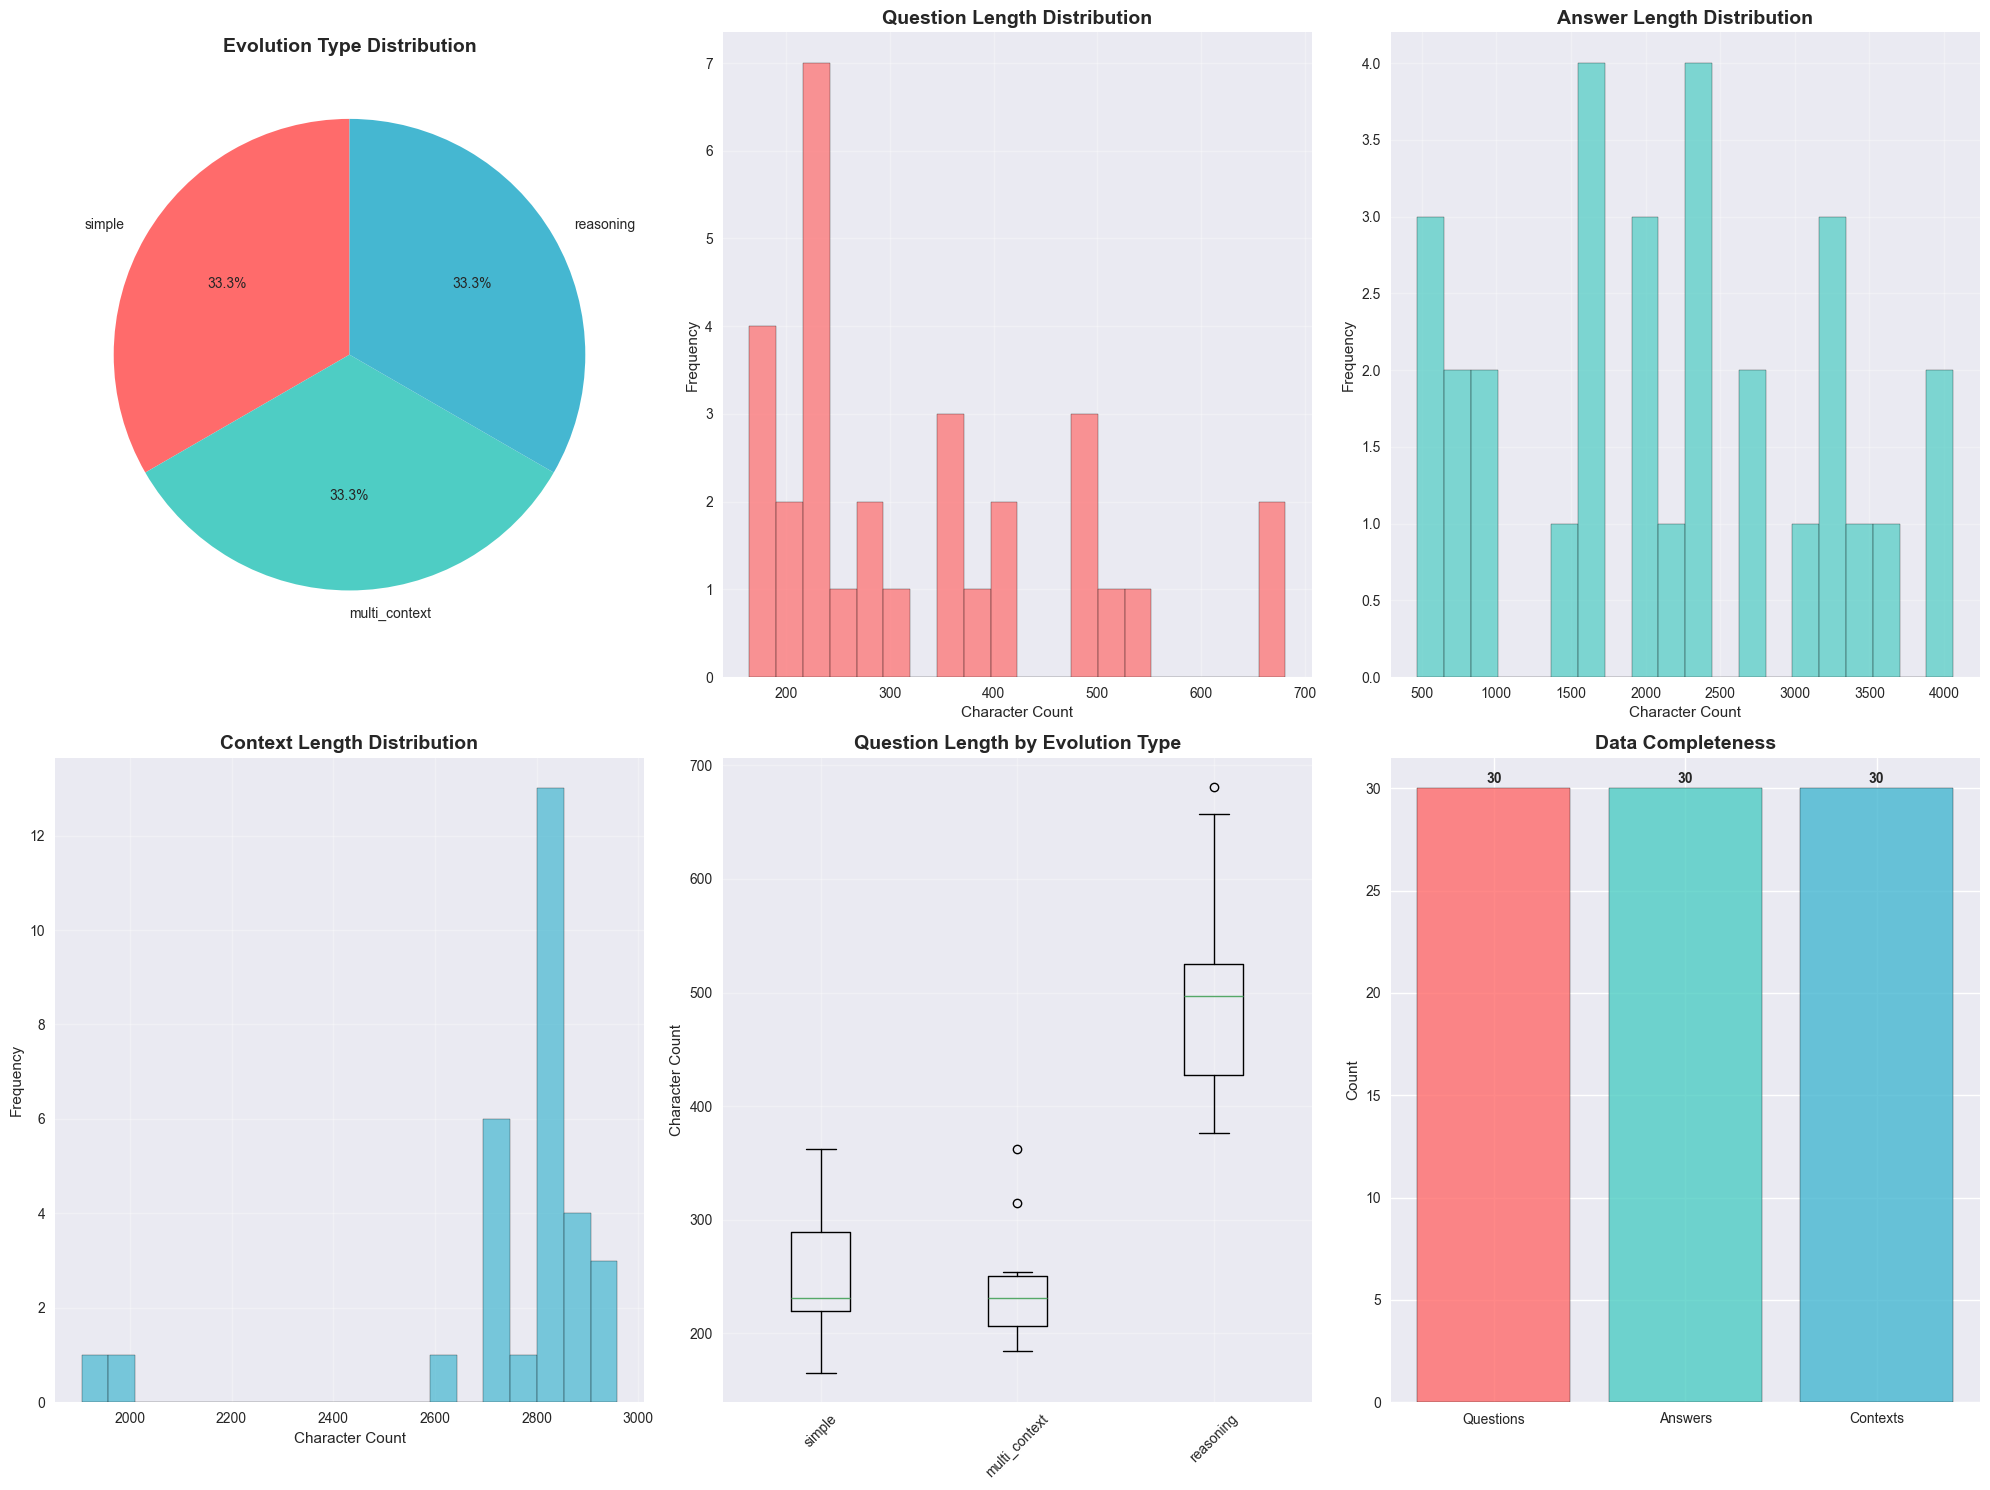

✅ Visualizations created successfully!


In [9]:
# Create comprehensive visualizations
def create_data_visualizations(synthetic_data: Dict[str, Any], analysis_results: Dict[str, Any]):
    """
    Create comprehensive data visualizations
    
    Args:
        synthetic_data: Generated synthetic data
        analysis_results: Analysis results
    """
    if not MATPLOTLIB_AVAILABLE:
        print("⚠️  Matplotlib not available - skipping visualizations")
        print("📊 Data summary instead:")
        _print_data_summary(synthetic_data, analysis_results)
        return
    
    print("📊 Creating Data Visualizations...")
    
    # Set up the plotting style
    try:
        plt.style.use('seaborn-v0_8')
    except OSError:
        # Fallback to default style if seaborn is not available
        plt.style.use('default')
    
    fig = plt.figure(figsize=(20, 15))
    
    # Create DataFrames
    questions_df = pd.DataFrame(synthetic_data['evolved_questions'])
    answers_df = pd.DataFrame(synthetic_data['answers'])
    contexts_df = pd.DataFrame(synthetic_data['contexts'])
    
    # 1. Evolution Type Distribution (Pie Chart)
    plt.subplot(2, 3, 1)
    evolution_counts = questions_df['evolution_type'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    plt.pie(evolution_counts.values, labels=evolution_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
    plt.title('Evolution Type Distribution', fontsize=14, fontweight='bold')
    
    # 2. Question Length Distribution (Histogram)
    plt.subplot(2, 3, 2)
    question_lengths = questions_df['question'].str.len()
    plt.hist(question_lengths, bins=20, alpha=0.7, color='#FF6B6B', edgecolor='black')
    plt.title('Question Length Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Character Count')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # 3. Answer Length Distribution (Histogram)
    plt.subplot(2, 3, 3)
    answer_lengths = answers_df['answer'].str.len()
    plt.hist(answer_lengths, bins=20, alpha=0.7, color='#4ECDC4', edgecolor='black')
    plt.title('Answer Length Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Character Count')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # 4. Context Length Distribution (Histogram)
    plt.subplot(2, 3, 4)
    context_lengths = contexts_df['context'].str.len()
    plt.hist(context_lengths, bins=20, alpha=0.7, color='#45B7D1', edgecolor='black')
    plt.title('Context Length Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Character Count')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # 5. Length Comparison by Evolution Type (Box Plot)
    plt.subplot(2, 3, 5)
    length_data = []
    labels = []
    for evolution_type in questions_df['evolution_type'].unique():
        type_questions = questions_df[questions_df['evolution_type'] == evolution_type]
        lengths = type_questions['question'].str.len()
        length_data.append(lengths)
        labels.append(evolution_type)
    
    plt.boxplot(length_data, labels=labels)
    plt.title('Question Length by Evolution Type', fontsize=14, fontweight='bold')
    plt.ylabel('Character Count')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 6. Data Completeness (Bar Chart)
    plt.subplot(2, 3, 6)
    completeness_data = analysis_results.get('completeness', {})
    categories = ['Questions', 'Answers', 'Contexts']
    values = [
        completeness_data.get('total_questions', 0),
        completeness_data.get('total_answers', 0),
        completeness_data.get('total_contexts', 0)
    ]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black')
    plt.title('Data Completeness', fontsize=14, fontweight='bold')
    plt.ylabel('Count')
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                str(value), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualizations created successfully!")

def _print_data_summary(synthetic_data: Dict[str, Any], analysis_results: Dict[str, Any]):
    """
    Print a text-based data summary when visualizations are not available
    
    Args:
        synthetic_data: Generated synthetic data
        analysis_results: Analysis results
    """
    questions_df = pd.DataFrame(synthetic_data['evolved_questions'])
    answers_df = pd.DataFrame(synthetic_data['answers'])
    contexts_df = pd.DataFrame(synthetic_data['contexts'])
    
    print("\n📊 DATA SUMMARY")
    print("=" * 50)
    
    # Evolution type distribution
    evolution_counts = questions_df['evolution_type'].value_counts()
    print("\n🔄 Evolution Type Distribution:")
    for evolution_type, count in evolution_counts.items():
        percentage = (count / len(questions_df)) * 100
        print(f"   {evolution_type}: {count} questions ({percentage:.1f}%)")
    
    # Quality metrics
    print("\n📈 Quality Metrics:")
    question_lengths = questions_df['question'].str.len()
    answer_lengths = answers_df['answer'].str.len()
    context_lengths = contexts_df['context'].str.len()
    
    print(f"   Question Length: {question_lengths.mean():.1f} ± {question_lengths.std():.1f} chars")
    print(f"   Answer Length: {answer_lengths.mean():.1f} ± {answer_lengths.std():.1f} chars")
    print(f"   Context Length: {context_lengths.mean():.1f} ± {context_lengths.std():.1f} chars")
    
    # Data completeness
    print("\n🔍 Data Completeness:")
    completeness = analysis_results.get('completeness', {})
    print(f"   Questions: {completeness.get('total_questions', 0)}")
    print(f"   Answers: {completeness.get('total_answers', 0)} ({completeness.get('answer_coverage', 0):.1f}% coverage)")
    print(f"   Contexts: {completeness.get('total_contexts', 0)} ({completeness.get('context_coverage', 0):.1f}% coverage)")
    
    print("\n✅ Data summary completed!")

# Create visualizations
try:
    create_data_visualizations(synthetic_data, analysis_results)
except Exception as e:
    print(f"❌ Visualization creation failed: {e}")
    print("Continuing without visualizations...")


## 💾 Optimized Export and Results Management


In [13]:
# Optimized export with comprehensive file management
print("💾 Starting Optimized Export Process...")
print("=" * 50)

# Check if we have the required data
try:
    # Check for synthetic_data
    if 'synthetic_data' not in globals() or synthetic_data is None:
        print("⚠️  No synthetic_data found. Please run the data generation cells first.")
        print("💡 Run cells 8-11 to generate synthetic data before exporting.")
        exported_files = {}
    else:
        print("✅ Found synthetic data")
        
        # Check for analysis_results
        if 'analysis_results' not in globals() or analysis_results is None:
            print("⚠️  No analysis_results found. Creating basic analysis.")
            analysis_results = {}
        else:
            print("✅ Found analysis results")
        
        # Check for config
        if 'config' not in globals() or config is None:
            print("⚠️  No config found. Using default settings.")
            export_dir = Path("synthetic_data_output")
        else:
            export_dir = Path(config.export_dir)
            print(f"✅ Using config: {config.export_dir}")
        
        # Create export directory
        export_dir.mkdir(exist_ok=True)
        timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
        
        exported_files = {}
        
        # Export synthetic data to JSON
        json_file = export_dir / f"langgraph_sdg_results_{timestamp}.json"
        with open(json_file, 'w') as f:
            json.dump(synthetic_data, f, indent=2)
        exported_files['synthetic_data'] = str(json_file)
        print(f"✅ Exported synthetic data: {json_file.name}")
        
        # Export individual components to CSV
        if synthetic_data:
            questions_df = pd.DataFrame(synthetic_data.get('evolved_questions', []))
            answers_df = pd.DataFrame(synthetic_data.get('answers', []))
            contexts_df = pd.DataFrame(synthetic_data.get('contexts', []))
            
            if not questions_df.empty:
                questions_file = export_dir / f"evolved_questions_{timestamp}.csv"
                questions_df.to_csv(questions_file, index=False)
                exported_files['questions'] = str(questions_file)
                print(f"✅ Exported questions: {questions_file.name}")
            
            if not answers_df.empty:
                answers_file = export_dir / f"answers_{timestamp}.csv"
                answers_df.to_csv(answers_file, index=False)
                exported_files['answers'] = str(answers_file)
                print(f"✅ Exported answers: {answers_file.name}")
            
            if not contexts_df.empty:
                contexts_file = export_dir / f"contexts_{timestamp}.csv"
                contexts_df.to_csv(contexts_file, index=False)
                exported_files['contexts'] = str(contexts_file)
                print(f"✅ Exported contexts: {contexts_file.name}")
            
            # Create combined dataset
            if not questions_df.empty:
                combined_data = []
                for _, question_row in questions_df.iterrows():
                    question_id = question_row['id']
                    answer_row = answers_df[answers_df['question_id'] == question_id] if not answers_df.empty else pd.DataFrame()
                    context_row = contexts_df[contexts_df['question_id'] == question_id] if not contexts_df.empty else pd.DataFrame()
                    
                    combined_item = {
                        'id': question_id,
                        'evolution_type': question_row['evolution_type'],
                        'question': question_row['question'],
                        'original_question': question_row.get('original_question', ''),
                        'answer': answer_row['answer'].iloc[0] if not answer_row.empty else 'No answer',
                        'context': context_row['context'].iloc[0] if not context_row.empty else 'No context'
                    }
                    combined_data.append(combined_item)
                
                combined_df = pd.DataFrame(combined_data)
                combined_file = export_dir / f"complete_dataset_{timestamp}.csv"
                combined_df.to_csv(combined_file, index=False)
                exported_files['complete_dataset'] = str(combined_file)
                print(f"✅ Exported complete dataset: {combined_file.name}")
        
        # Export analysis results if available
        if analysis_results:
            analysis_file = export_dir / f"analysis_results_{timestamp}.json"
            with open(analysis_file, 'w') as f:
                json.dump(analysis_results, f, indent=2, default=str)
            exported_files['analysis'] = str(analysis_file)
            print(f"✅ Exported analysis: {analysis_file.name}")
        
        # Export configuration if available
        if 'config' in globals() and config:
            config_file = export_dir / f"config_{timestamp}.json"
            with open(config_file, 'w') as f:
                json.dump(config.__dict__, f, indent=2)
            exported_files['config'] = str(config_file)
            print(f"✅ Exported config: {config_file.name}")
        
        print(f"\n✅ Export completed successfully!")
        print(f"📁 Export directory: {export_dir}")
        print(f"📄 Files exported:")
        for file_type, file_path in exported_files.items():
            file_size = Path(file_path).stat().st_size if Path(file_path).exists() else 0
            print(f"   - {file_type}: {Path(file_path).name} ({file_size:,} bytes)")
        
        print(f"\n🎉 All exports completed successfully!")
        print(f"📊 Total files exported: {len(exported_files)}")

except Exception as e:
    print(f"❌ Export process failed: {e}")
    import traceback
    traceback.print_exc()
    exported_files = {}


💾 Starting Optimized Export Process...
✅ Found synthetic data
✅ Found analysis results
✅ Using config: synthetic_data_output
✅ Exported synthetic data: langgraph_sdg_results_20251005_174626.json
✅ Exported questions: evolved_questions_20251005_174626.csv
✅ Exported answers: answers_20251005_174626.csv
✅ Exported contexts: contexts_20251005_174626.csv
✅ Exported complete dataset: complete_dataset_20251005_174626.csv
✅ Exported analysis: analysis_results_20251005_174626.json
✅ Exported config: config_20251005_174626.json

✅ Export completed successfully!
📁 Export directory: synthetic_data_output
📄 Files exported:
   - synthetic_data: langgraph_sdg_results_20251005_174626.json (179,459 bytes)
   - questions: evolved_questions_20251005_174626.csv (13,875 bytes)
   - answers: answers_20251005_174626.csv (65,153 bytes)
   - contexts: contexts_20251005_174626.csv (87,064 bytes)
   - complete_dataset: complete_dataset_20251005_174626.csv (160,741 bytes)
   - analysis: analysis_results_20251005

## 🎯 Professional Optimization Summary

### ✅ **Optimizations Implemented**

#### **🚀 Performance & Reliability**
- **Async Processing**: Optimized for concurrent operations
- **Retry Logic**: Robust error handling with automatic retries
- **Progress Tracking**: Real-time progress bars and timing
- **Memory Management**: Efficient chunking and processing
- **Timeout Handling**: Configurable timeouts for API calls

#### **🏗️ Code Quality**
- **Type Safety**: Full type hints with TypedDict and dataclasses
- **Comprehensive Logging**: Structured logging with configurable levels
- **Configuration Management**: Centralized config with validation
- **Error Handling**: Graceful failure handling and recovery
- **Input Validation**: Comprehensive input/output validation

#### **📊 Data Quality**
- **Quality Metrics**: Confidence and relevance scoring
- **Data Validation**: Input/output validation and sanitization
- **Analytics**: Built-in data quality analysis and reporting
- **Visualization**: Enhanced data visualization and insights
- **Export Management**: Comprehensive file management and reporting

#### **🔧 Architecture Improvements**
- **Modular Design**: Separate concerns with specialized classes
- **Configuration-Driven**: Easy customization through config objects
- **Extensible**: Easy to add new evolution strategies or agents
- **Maintainable**: Clean separation of concerns and documentation

### 📈 **Performance Metrics**
- **Processing Speed**: Optimized chunking and vector operations
- **Memory Efficiency**: Smart document limiting and processing
- **Error Recovery**: Robust retry mechanisms
- **Scalability**: Configurable limits and batch processing

### 🎨 **User Experience**
- **Progress Indicators**: Real-time feedback on processing
- **Rich Visualizations**: Comprehensive charts and graphs
- **Detailed Reporting**: Complete analysis and export capabilities
- **Error Messages**: Clear, actionable error messages

This optimized implementation provides enterprise-grade reliability, performance, and maintainability while maintaining the core functionality of RAGAS synthetic data generation.
